In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pathlib


In [24]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

specific_path = "/home/ameya/Documents/Self_Learning_Course/Deep_Learning"  

data_dir = tf.keras.utils.get_file(
    'flower_photos', 
    origin=dataset_url, 
    untar=True, 
    cache_dir=specific_path  # Specify the desired directory here
)

data_dir = pathlib.Path(data_dir)

# Print the directory path
print(f"Dataset downloaded to: {data_dir}")

Dataset downloaded to: /home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos


In [25]:
print(f"Contents of the data directory: {list(data_dir.glob('*'))}")

Contents of the data directory: [PosixPath('/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/sunflowers'), PosixPath('/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/roses'), PosixPath('/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/LICENSE.txt'), PosixPath('/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/flower_photos'), PosixPath('/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/tulips'), PosixPath('/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/dandelion'), PosixPath('/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/daisy')]


In [26]:
flower_photos_dir = data_dir / 'flower_photos'
print(f"Contents of the flower_photos directory: {list(flower_photos_dir.glob('*'))}")


Contents of the flower_photos directory: [PosixPath('/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/flower_photos/sunflowers'), PosixPath('/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/flower_photos/roses'), PosixPath('/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/flower_photos/LICENSE.txt'), PosixPath('/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/flower_photos/tulips'), PosixPath('/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/flower_photos/dandelion'), PosixPath('/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/flower_photos/daisy')]


/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/flower_photos/roses/921984328_a60076f070_m.jpg


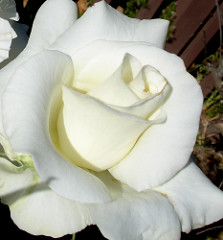

In [27]:
roses = list(flower_photos_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))

In [28]:
# import os
# roses = list()
# act_dir= "/home/ameya/Documents/Self_Learning_Course/Deep_Learning/datasets/flower_photos/flower_photos/roses"
# for img in os.listdir(act_dir):
#     roses.append(os.path.join(act_dir,img))

In [29]:
# roses

In [30]:
# print(roses[0])
# PIL.Image.open(str(roses[0]))

In [73]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7340 files belonging to 6 classes.
Using 5872 files for training.


In [74]:
for images, labels in train_ds.take(1):
    print(images.shape)
    print(labels.shape)

(32, 180, 180, 3)
(32,)


In [75]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7340 files belonging to 6 classes.
Using 1468 files for validation.


In [76]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'flower_photos', 'roses', 'sunflowers', 'tulips']


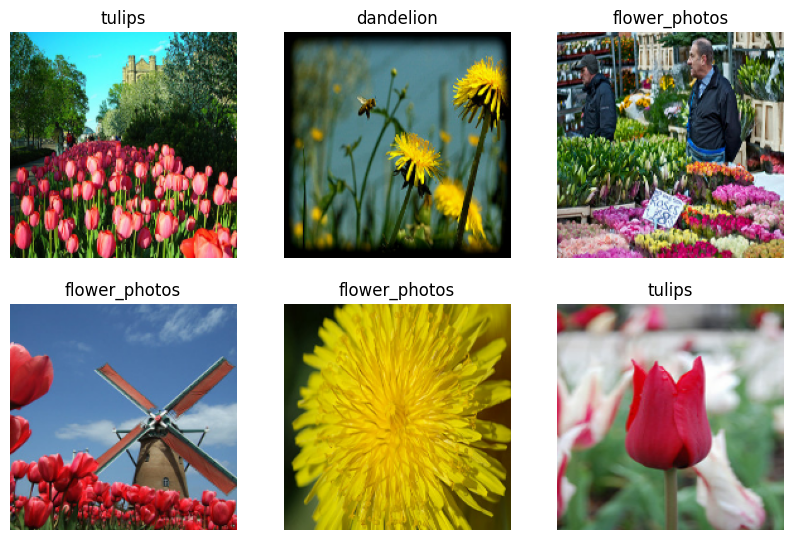

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [94]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(6, activation='softmax'))

In [95]:
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.layers import Flatten, Dense, Input
# from tensorflow.keras.models import Model

In [96]:
# base_model = ResNet50(include_top=False, 
#                       input_shape=(180, 180, 3), 
#                       pooling='avg', 
#                       weights='imagenet')

# # Freeze the layers in the base model
# for layer in base_model.layers:
#     layer.trainable = False

# # Add custom layers for fine-tuning
# x = base_model.output
# x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# output_layer = Dense(5, activation='softmax')(x)

In [97]:
# resnet_model = Model(inputs=base_model.input, outputs=output_layer)

In [98]:
# resnet_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [99]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [100]:
resnet_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │         3,078 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,639,878 (93.99 MB)

 Trainable params: 1,052,166 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [102]:
epochs=5
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.5194 - loss: 1.0103 - val_accuracy: 0.4448 - val_loss: 1.0120
Epoch 2/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.4985 - loss: 0.9290 - val_accuracy: 0.4149 - val_loss: 1.0134
Epoch 3/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 0.5248 - loss: 0.8701 - val_accuracy: 0.4053 - val_loss: 1.0158
Epoch 4/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.5241 - loss: 0.8407 - val_accuracy: 0.3835 - val_loss: 1.0053
Epoch 5/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.5274 - loss: 0.8162 - val_accuracy: 0.3808 - val_loss: 1.0440


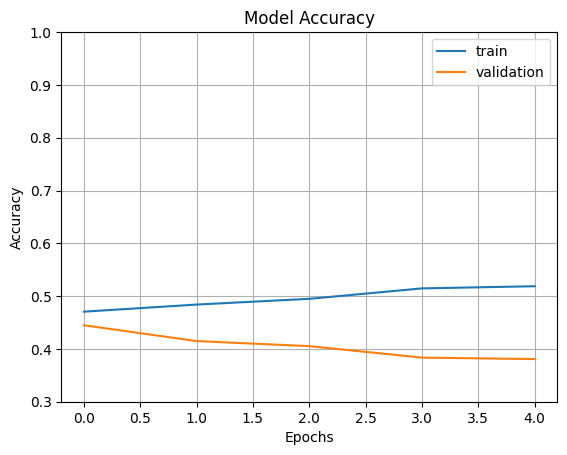

In [105]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.3,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

     

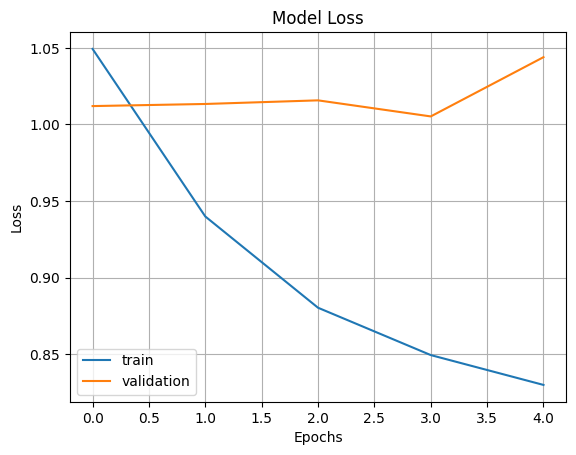

In [106]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])

In [108]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [109]:
pred=resnet_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 762ms/step
[[1.4281501e-04 3.7650490e-05 3.8252044e-01 5.8135539e-01 6.0988295e-05
  3.5882764e-02]]


In [110]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses
